### Imports

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

### Data Loading and Inspection

In [13]:
df = pd.read_csv('College.csv')

In [14]:
print(df.head())

                     Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.R

In [15]:
# Rename Ubound column to College
df = df.rename(columns={"Unnamed: 0": "College" })
print(df.head())

                        College Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.R

In [16]:
df.shape

(777, 19)

In [17]:
df.dtypes

College         object
Private         object
Apps             int64
Accept           int64
Enroll           int64
Top10perc        int64
Top25perc        int64
F.Undergrad      int64
P.Undergrad      int64
Outstate         int64
Room.Board       int64
Books            int64
Personal         int64
PhD              int64
Terminal         int64
S.F.Ratio      float64
perc.alumni      int64
Expend           int64
Grad.Rate        int64
dtype: object

In [18]:
# Check missing values
print(df.isnull().sum())

College        0
Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64


In [19]:
# Descriptive statistics
print(df.describe())

               Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      

In [20]:
# Only keep numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Check skewness sorted
numeric_df.skew().sort_values(ascending=False)


P.Undergrad    5.692353
Apps           3.723750
Books          3.485025
Expend         3.459322
Accept         3.417727
Enroll         2.690465
F.Undergrad    2.610458
Personal       1.742497
Top10perc      1.413217
S.F.Ratio      0.667435
perc.alumni    0.606891
Outstate       0.509278
Room.Board     0.477356
Top25perc      0.259340
Grad.Rate     -0.113777
PhD           -0.768170
Terminal      -0.816542
dtype: float64

In [21]:
# Unique values in the categorical column
print("Unique values in 'Private':", df["Private"].unique())

Unique values in 'Private': ['Yes' 'No']


In [22]:
# Distribution of the target (Graduation Rate)
print(df["Grad.Rate"].value_counts().sort_index())

Grad.Rate
10      1
15      2
18      1
21      3
22      1
       ..
97      5
98      5
99      5
100    10
118     1
Name: count, Length: 81, dtype: int64


In [23]:
# Correlation with Graduation Rate
print(df.corr(numeric_only=True)["Grad.Rate"].sort_values(ascending=False))

Grad.Rate      1.000000
Outstate       0.571290
Top10perc      0.494989
perc.alumni    0.490898
Top25perc      0.477281
Room.Board     0.424942
Expend         0.390343
PhD            0.305038
Terminal       0.289527
Apps           0.146755
Accept         0.067313
Books          0.001061
Enroll        -0.022341
F.Undergrad   -0.078773
P.Undergrad   -0.257001
Personal      -0.269344
S.F.Ratio     -0.306710
Name: Grad.Rate, dtype: float64


In [24]:
# Duplicate rows
print(df.duplicated().sum())


0


### Visualization 

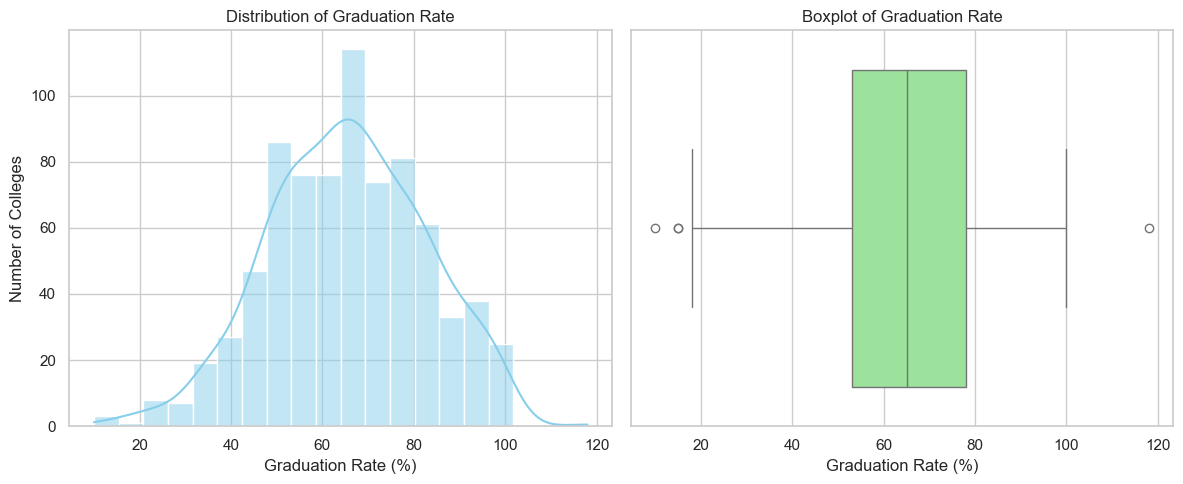

In [25]:
# Set seaborn style
sns.set(style="whitegrid")

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of Graduation Rate
sns.histplot(df["Grad.Rate"], bins=20, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Distribution of Graduation Rate")
axes[0].set_xlabel("Graduation Rate (%)")
axes[0].set_ylabel("Number of Colleges")

# Boxplot of Graduation Rate
sns.boxplot(x=df["Grad.Rate"], ax=axes[1], color="lightgreen")
axes[1].set_title("Boxplot of Graduation Rate")
axes[1].set_xlabel("Graduation Rate (%)")

plt.tight_layout()
plt.show()

C:\Users\vithu\AppData\Local\Temp\ipykernel_18552\1886157503.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Private", y="Grad.Rate", data=df, palette="Set3")


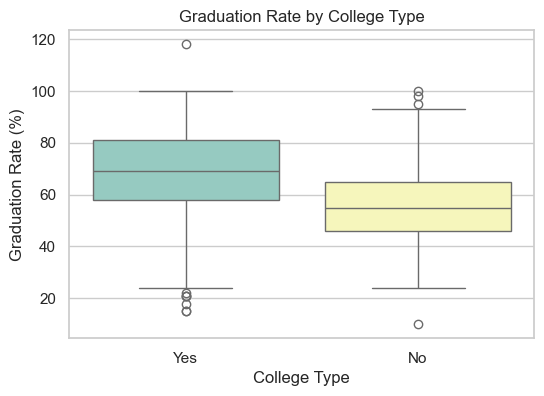

In [26]:
# Boxplot: Grad.Rate by Private
plt.figure(figsize=(6,4))
sns.boxplot(x="Private", y="Grad.Rate", data=df, palette="Set3")
plt.title("Graduation Rate by College Type")
plt.xlabel("College Type")
plt.ylabel("Graduation Rate (%)")
plt.show()


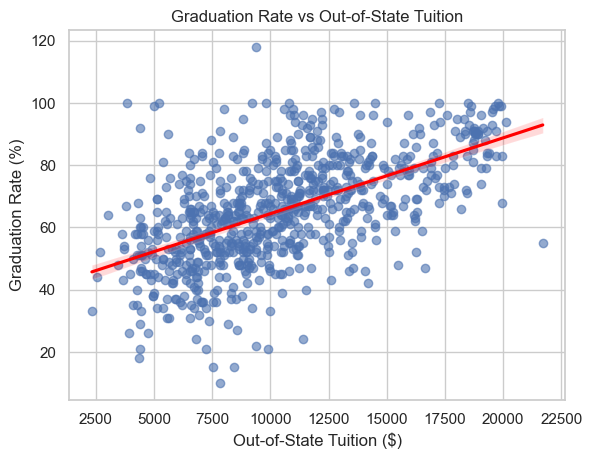

In [27]:
# Scatterplot with regression line: Grad.Rate vs Out-of-State Tuition
sns.regplot(x="Outstate", y="Grad.Rate", data=df, scatter_kws={"alpha":0.6}, line_kws={"color":"red"})
plt.title("Graduation Rate vs Out-of-State Tuition")
plt.xlabel("Out-of-State Tuition ($)")
plt.ylabel("Graduation Rate (%)")
plt.show()

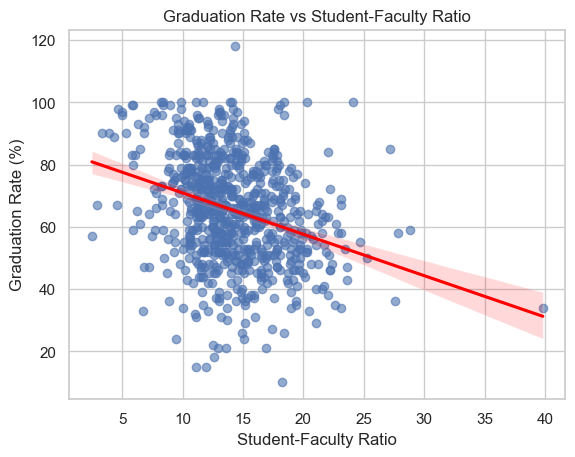

In [28]:
# Scatterplot with regression line: Grad.Rate vs Student-Faculty Ratio
sns.regplot(x="S.F.Ratio", y="Grad.Rate", data=df, scatter_kws={"alpha":0.6}, line_kws={"color":"red"})
plt.title("Graduation Rate vs Student-Faculty Ratio")
plt.xlabel("Student-Faculty Ratio")
plt.ylabel("Graduation Rate (%)")
plt.show()


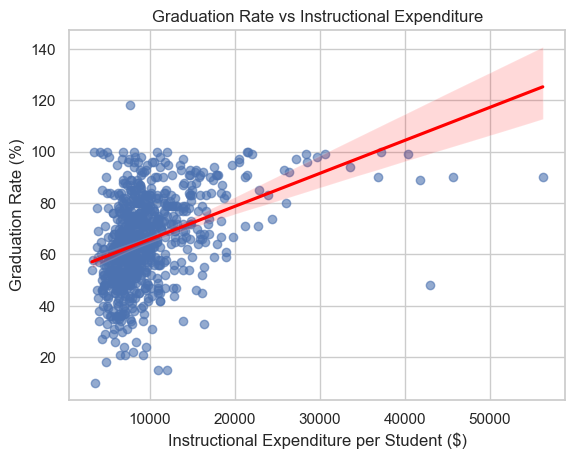

In [29]:
# Scatterplot with regression line: Grad.Rate vs Expend
sns.regplot(x="Expend", y="Grad.Rate", data=df, scatter_kws={"alpha":0.6}, line_kws={"color":"red"})
plt.title("Graduation Rate vs Instructional Expenditure")
plt.xlabel("Instructional Expenditure per Student ($)")
plt.ylabel("Graduation Rate (%)")
plt.show()

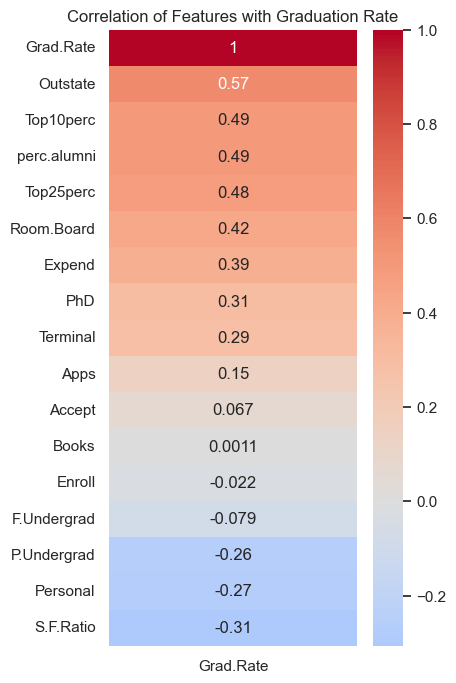

In [30]:
# Correlation with Grad.Rate
corr_with_target = df.corr(numeric_only=True)[["Grad.Rate"]].sort_values(by="Grad.Rate", ascending=False)

# Plot heatmap
plt.figure(figsize=(4,8))
sns.heatmap(corr_with_target, annot=True, cmap="coolwarm", center=0, cbar=True)
plt.title("Correlation of Features with Graduation Rate")
plt.show()


### Preprocessing

In [31]:
# Copy dataframe to keep original intact
df_clean = df.copy()

# Cap impossible graduation rates at 100
df_clean["Grad.Rate"] = df_clean["Grad.Rate"].clip(0, 100)
df_clean["PhD"]       = df_clean["PhD"].clip(0, 100)

# Encode Private (Yes=1, No=0)
df_clean["Private"] = df_clean["Private"].map({"Yes": 1, "No": 0})

# Log-transform skewed features (add +1 to avoid log(0))
skewed_features = [
    "Apps", "Accept", "Enroll",
    "F.Undergrad", "P.Undergrad",
    "Expend", "Books", "Personal"
]
for col in skewed_features:
    df_clean[col + "_log"] = np.log1p(df_clean[col])

# Preview cleaned dataset
df_clean.head()

,College,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,...,Expend,Grad.Rate,Apps_log,Accept_log,Enroll_log,F.Undergrad_log,P.Undergrad_log,Expend_log,Books_log,Personal_log
0,Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,...,7041,60,7.415175,7.117206,6.582025,7.967627,6.287859,8.859647,6.111467,7.696667
1,Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,...,10527,56,7.690286,7.562681,6.240276,7.895063,7.113142,9.261794,6.621406,7.313887
2,Adrian College,1,1428,1097,336,22,50,1036,99,11250,...,8735,54,7.264730,7.001246,5.820083,6.944087,4.605170,9.075208,5.993961,7.061334
3,Agnes Scott College,1,417,349,137,60,89,510,63,12960,...,19016,59,6.035481,5.857933,4.927254,6.236370,4.158883,9.853089,6.111467,6.775366
4,Alaska Pacific University,1,193,146,55,16,44,249,869,7560,...,10922,15,5.267858,4.990433,4.025352,5.521461,6.768493,9.298626,6.685861,7.313887


### Feature Engineering

In [32]:
# Copy dataset to avoid overwriting
df_eng = df_clean.copy()

# Acceptance rate (protect from div by 0)
df_eng["accept_rate"] = df_eng["Accept"] / df_eng["Apps"].replace(0, np.nan)

# Yield rate (protect from div by 0)
df_eng["yield_rate"] = df_eng["Enroll"] / df_eng["Accept"].replace(0, np.nan)

# Total undergraduates
df_eng["total_ug"] = df_eng["F.Undergrad"] + df_eng["P.Undergrad"]

# Expenditure per student (protect from div by 0)
df_eng["expend_per_student"] = df_eng["Expend"] / df_eng["total_ug"].replace(0, np.nan)

# Total cost (annual)
df_eng["cost_total"] = (
    df_eng["Outstate"] + df_eng["Room.Board"] + df_eng["Books"] + df_eng["Personal"]
)

# Replace any inf/nan from division by 0 with 0
df_eng = df_eng.replace([np.inf, -np.inf], np.nan).fillna(0)

# Quick check
df_eng[["accept_rate", "yield_rate", "total_ug", "expend_per_student", "cost_total"]].head()


,accept_rate,yield_rate,total_ug,expend_per_student,cost_total
0,0.742169,0.585227,3422,2.057569,13390
1,0.880146,0.266112,3910,2.692327,20980
2,0.768207,0.306290,1135,7.696035,16565
3,0.836930,0.392550,573,33.186736,19735
4,0.756477,0.376712,1118,9.769231,13980


### Split into Train and Test

In [33]:
# Target variable
y = df_eng["Grad.Rate"]

# Raw skewed features to drop to keep log versions only
raw_skewed = [
    "Apps", "Accept", "Enroll",
    "F.Undergrad", "P.Undergrad",
    "Expend", "Books", "Personal"
]

# Drop identifier, target, and raw skewed features
X = df_eng.drop(columns=["College", "Grad.Rate"] + raw_skewed)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("y_train mean:", round(y_train.mean(), 2), "| y_test mean:", round(y_test.mean(), 2))


Train shape: (621, 22)
Test shape: (156, 22)
y_train mean: 65.26 | y_test mean: 66.15


In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Convert back to DataFrame (to keep column names for feature selection)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled  = pd.DataFrame(X_test_scaled,  columns=X_test.columns,  index=X_test.index)


### Feature Selection 

In [35]:
# Apply variance threshold on scaled data
selector = VarianceThreshold(threshold=0.10) 
X_train_var = selector.fit_transform(X_train_scaled)
X_test_var  = selector.transform(X_test_scaled)  # Apply same filter to test set

# Get kept feature names
selected_features_var = X_train_scaled.columns[selector.get_support()]

# Convert back to DataFrames
X_train_var = pd.DataFrame(X_train_var, columns=selected_features_var, index=X_train_scaled.index)
X_test_var  = pd.DataFrame(X_test_var,  columns=selected_features_var, index=X_test_scaled.index)

# Print summary
print("Number of features before:", X_train_scaled.shape[1])
print("Number of features after :", X_train_var.shape[1])
print("Features kept:\n", selected_features_var.tolist())

# Dropped features
dropped_features = X_train_scaled.columns[~selector.get_support()]
print("\nFeatures dropped:\n", dropped_features.tolist())


Number of features before: 22
Number of features after : 22
Features kept:
 ['Private', 'Top10perc', 'Top25perc', 'Outstate', 'Room.Board', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Apps_log', 'Accept_log', 'Enroll_log', 'F.Undergrad_log', 'P.Undergrad_log', 'Expend_log', 'Books_log', 'Personal_log', 'accept_rate', 'yield_rate', 'total_ug', 'expend_per_student', 'cost_total']

Features dropped:
 []


In [36]:
# Correlation with target (train only, scaled + variance filtered data)
corr_with_target = X_train_var.corrwith(y_train)

# Keep features with |correlation| >= 0.2
corr_thresh = 0.2
kept_by_corr = corr_with_target[ corr_with_target.abs() >= corr_thresh ].sort_values(ascending=False)

print("Correlation threshold:", corr_thresh)
print("Features before:", X_train_var.shape[1])
print("Features kept by correlation:", kept_by_corr.shape[0])
print("\nKept features (sorted by correlation):")
print(kept_by_corr)

# Reduce train/test to the kept features
X_train_corr = X_train_var[kept_by_corr.index]
X_test_corr  = X_test_var[kept_by_corr.index]

print("\nShapes after correlation filter ->",
      "X_train:", X_train_corr.shape, "| X_test:", X_test_corr.shape)


Correlation threshold: 0.2
Features before: 22
Features kept by correlation: 15

Kept features (sorted by correlation):
Outstate           0.556941
cost_total         0.535325
perc.alumni        0.486998
Top10perc          0.483070
Top25perc          0.470448
Expend_log         0.414541
Room.Board         0.413497
Private            0.341737
PhD                0.296093
Terminal           0.269999
P.Undergrad_log   -0.263682
Personal_log      -0.270749
yield_rate        -0.282212
S.F.Ratio         -0.310184
accept_rate       -0.310976
dtype: float64

Shapes after correlation filter -> X_train: (621, 15) | X_test: (156, 15)


### Modeling

In [37]:
# Multiple Linear Regression
linreg = LinearRegression()
linreg.fit(X_train_corr, y_train)

y_pred_train = linreg.predict(X_train_corr)
y_pred_test  = linreg.predict(X_test_corr)

print("Train:", {
    "RMSE": root_mean_squared_error(y_train, y_pred_train),
    "MAE":  mean_absolute_error(y_train, y_pred_train),
    "R2":   r2_score(y_train, y_pred_train),
})
print("Test :", {
    "RMSE": root_mean_squared_error(y_test, y_pred_test),
    "MAE":  mean_absolute_error(y_test, y_pred_test),
    "R2":   r2_score(y_test, y_pred_test),
})


Train: {'RMSE': 13.016110719097401, 'MAE': 9.819616049315455, 'R2': 0.44806858798626537}
Test : {'RMSE': 11.288339217521608, 'MAE': 8.628725587860698, 'R2': 0.45822626717988557}


In [38]:
# Random Forest
rf = RandomForestRegressor(
    n_estimators=500,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_corr, y_train)

# Predictions
y_pred_train = rf.predict(X_train_corr)
y_pred_test  = rf.predict(X_test_corr)

# Metrics function
def metrics(y_true, y_pred):
    return {
        "RMSE": root_mean_squared_error(y_true, y_pred),
        "MAE":  mean_absolute_error(y_true, y_pred),
        "R2":   r2_score(y_true, y_pred)
    }

print("Random Forest (Train):", metrics(y_train, y_pred_train))
print("Random Forest (Test) :", metrics(y_test,  y_pred_test))


Random Forest (Train): {'RMSE': 5.007250300158561, 'MAE': 3.6943639291465384, 'R2': 0.9183189624237532}
Random Forest (Test) : {'RMSE': 11.468453816828053, 'MAE': 8.788551282051284, 'R2': 0.44079946032515305}


### Model selection

In [39]:
# Collect results in a dict
results = {}

# Multiple Linear Regression
y_pred = linreg.predict(X_test_corr)
results["Multiple Linear Regression"] = {
    "RMSE": root_mean_squared_error(y_test, y_pred),
    "MAE": mean_absolute_error(y_test, y_pred),
    "R2":  r2_score(y_test, y_pred)
}

# Random Forest
y_pred = rf.predict(X_test_corr)  # same feature set as Multiple Linear Regression
results["RandomForest"] = {
    "RMSE": root_mean_squared_error(y_test, y_pred),
    "MAE": mean_absolute_error(y_test, y_pred),
    "R2":  r2_score(y_test, y_pred)
}

# Make a DataFrame for visual comparison
results_df = pd.DataFrame(results).T.round(3)
print(results_df)


                              RMSE    MAE     R2
Multiple Linear Regression  11.288  8.629  0.458
RandomForest                11.468  8.789  0.441


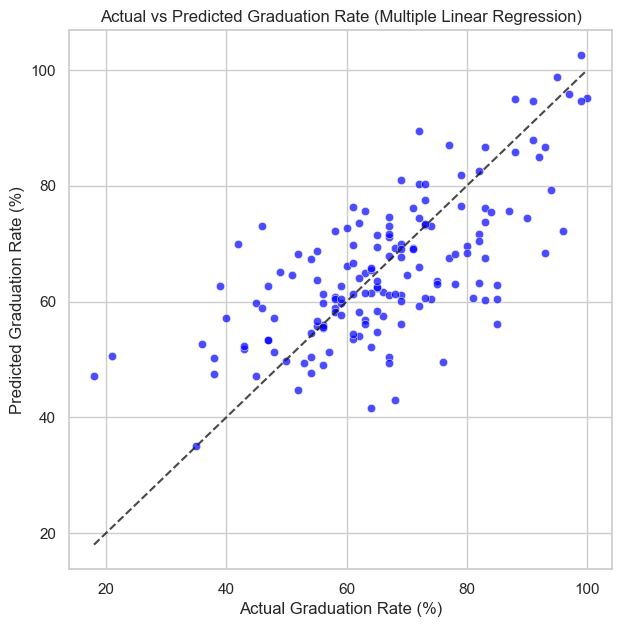

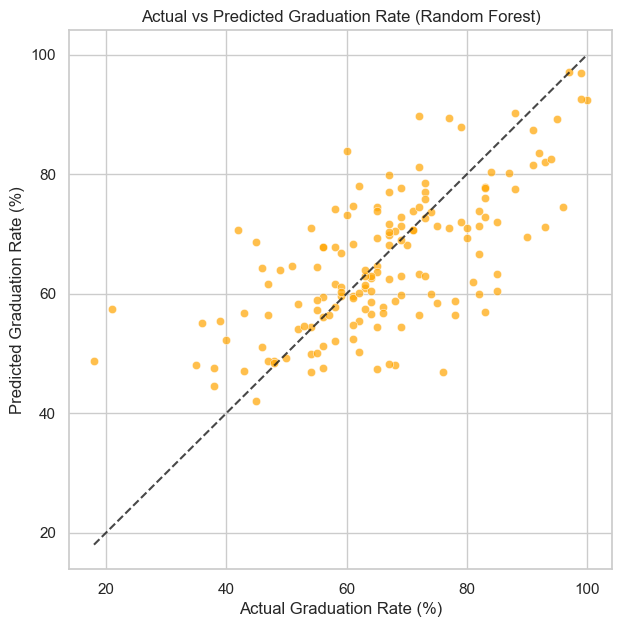

In [ ]:
# Multiple Linear Regression
y_pred_mlr = linreg.predict(X_test_corr)

plt.figure(figsize=(7, 7))
sns.scatterplot(x=y_test, y=y_pred_mlr, alpha=0.7, color="blue")
lims = [y_test.min(), y_test.max()]
plt.plot(lims, lims, 'k--', alpha=0.8)
plt.xlabel("Actual Graduation Rate (%)")
plt.ylabel("Predicted Graduation Rate (%)")
plt.title("Actual vs Predicted Graduation Rate (Multiple Linear Regression)")
plt.show()


# Random Forest 
y_pred_rf = rf.predict(X_test_corr)

plt.figure(figsize=(7, 7))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.7, color="orange")
lims = [y_test.min(), y_test.max()]
plt.plot(lims, lims, 'k--', alpha=0.8)
plt.xlabel("Actual Graduation Rate (%)")
plt.ylabel("Predicted Graduation Rate (%)")
plt.title("Actual vs Predicted Graduation Rate (Random Forest)")
plt.show()


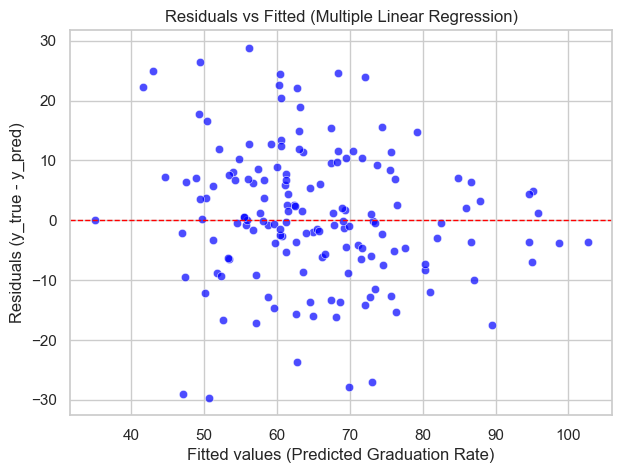

In [ ]:
# Residuals
residuals = y_test - y_pred_mlr

# Residuals vs Fitted plot
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred_mlr, y=residuals, alpha=0.7, color="blue")
plt.axhline(0, color="red", linestyle="--", linewidth=1) 
plt.title("Residuals vs Fitted (Multiple Linear Regression)")
plt.xlabel("Fitted values (Predicted Graduation Rate)")
plt.ylabel("Residuals (y_true - y_pred)")
plt.show()


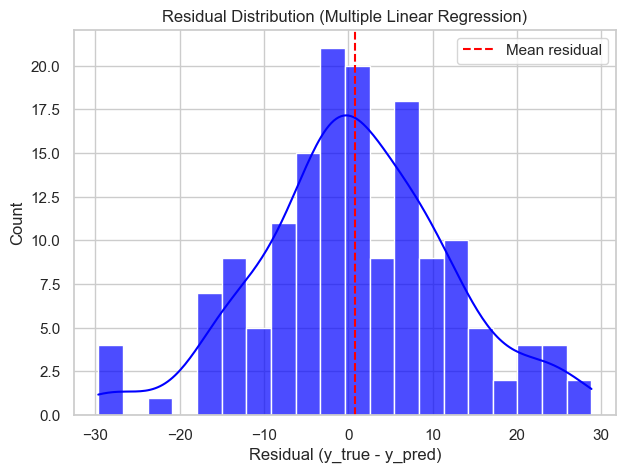

In [48]:
# Residuals
residuals = y_test - y_pred_mlr

# Plot residual distribution
plt.figure(figsize=(7,5))
sns.histplot(residuals, bins=20, kde=True, color="blue", edgecolor="white", alpha=0.7)
plt.axvline(residuals.mean(), color="red", linestyle="--", label="Mean residual")
plt.title("Residual Distribution (Multiple Linear Regression)")
plt.xlabel("Residual (y_true - y_pred)")
plt.ylabel("Count")
plt.legend()
plt.show()
